In [17]:
! pip install --upgrade imutils

In [18]:
! pip install tensorflow == 1.14.0

ERROR: Could not find a version that satisfies the requirement tensorflow==1.14.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.18.0rc0, 2.18.0rc1)
ERROR: No matching distribution found for tensorflow==1.14.0


In [19]:
! pip install opencv-python

In [20]:
! pip install keras==2.2.4 
! pip install -U scikit-image==0.16.2

  Using cached scikit-image-0.16.2.tar.gz (28.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-image
Failed to build scikit-image


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [602 lines of output]
      C:\Users\samer\AppData\Local\Temp\pip-install-p0lkz401\scikit-image_1856889417bd4c85bf726aa9e718a887\setup.py:167: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.core import setup
      Partial import of skimage during the build process.
      Cython >= 0.23.4 not found; falling back to pre-built C:\Users\samer\AppData\Local\Temp\pip-install-p0lkz401\scikit-image_1856889417bd4c85bf726aa9e718a887\skimage\_shared\geom

In [21]:
! pip install wheel
! pip install pandas

In [22]:
! pip install tqdm


In [23]:
! pip3 install imgaug

In [24]:
import os
import re
import sys
import cv2
import glob 
import time
import json
import math
import random
import imutils
import itertools
import matplotlib
import numpy as np # linear algebra
import skimage.draw
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
from tqdm import tqdm
import matplotlib.cm as cm
from skimage.io import imread
import matplotlib.pyplot as plt
import PIL.ImageDraw as ImageDraw
from imgaug import augmenters as iaa

from IPython.display import clear_output


In [25]:

! git clone https://github.com/matterport/Mask_RCNN.git 
! git clone https://github.com/rastislavkopal/brain-tumor-segmentation.git


'git' is not recognized as an internal or external command,
operable program or batch file.
'git' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
    
! rm -rf brain-tumor-segmentation/.git/
! rm -rf Mask_RCNN/.git/



'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
! pip install --user protobuf==3.20.0



In [28]:
! pip install pycocotools


In [37]:
! pip install mrcnn
! pip install keras==2.2.4 tensorflow==1.14.0

ERROR: Could not find a version that satisfies the requirement tensorflow==1.14.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.18.0rc0, 2.18.0rc1)
ERROR: No matching distribution found for tensorflow==1.14.0


In [42]:
# Import libraries needed for Mask R-CNN
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable  # Make sure to import from collections.abc to avoid errors

# Root directory of the project
ROOT_DIR = os.path.abspath("./Mask_RCNN")

# Ensure that Mask R-CNN's local version is on the Python path
sys.path.append(ROOT_DIR)

# Import Mask R-CNN core libraries
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

# Set up for plotting in notebooks
%matplotlib inline

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
DEFAULT_LOGS_DIR = 'logs' 

# Local path to the trained COCO weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from the Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Import COCO config (you may need to adjust the path if this causes errors)
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))
import coco

# Configuration for the brain tumor segmentation task (customized for your dataset)
class BrainTumorConfig(Config):
    NAME = "brain_tumor"
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1  # Background + tumor
    STEPS_PER_EPOCH = 100
    DETECTION_MIN_CONFIDENCE = 0.9  # Only detect with high confidence

# Dataset directory where the brain tumor data is stored
DATASET_DIR = './brain-tumor-segmentation/brain_tumor_data/'

# Initialize the model in inference mode
config = BrainTumorConfig()
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=MODEL_DIR)

# Load the pre-trained COCO weights into the model
print("Loading weights from ", COCO_MODEL_PATH)
model.load_weights(COCO_MODEL_PATH, by_name=True)

# Prepare the dataset for inference or training (depending on your goal)
# Load and preprocess your brain tumor images here

# Example function to run detection on a test image
def run_inference(image_path):
    # Load an image (assuming you have a utility function for this)
    image = plt.imread(image_path)
    
    # Perform inference and visualize the results
    results = model.detect([image], verbose=1)
    r = results[0]
    
    # Visualize the detection results
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                ['BG', 'tumor'], r['scores'])

# Example usage (provide a path to a test brain tumor image)
test_image_path = './brain-tumor-segmentation/brain_tumor_data/test_image.jpg'
run_inference(test_image_path)



ImportError: cannot import name 'Iterable' from 'collections' (c:\Users\samer\AppData\Local\Programs\Python\Python311\Lib\collections\__init__.py)

In [36]:
# Import libraries needed for Mask R-CNN 

# Root directory of the project
ROOT_DIR = os.path.abspath("./Mask_RCNN")
#!python setup.py -q install
from collections.abc import Iterable
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
DEFAULT_LOGS_DIR = 'logs' 

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Import COCO config  
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))
import coco

plt.rcParams['figure.facecolor'] = 'white'

DATASET_DIR = './brain-tumor-segmentation/brain_tumor_data/'

ImportError: cannot import name 'Iterable' from 'collections' (c:\Users\samer\AppData\Local\Programs\Python\Python311\Lib\collections\__init__.py)

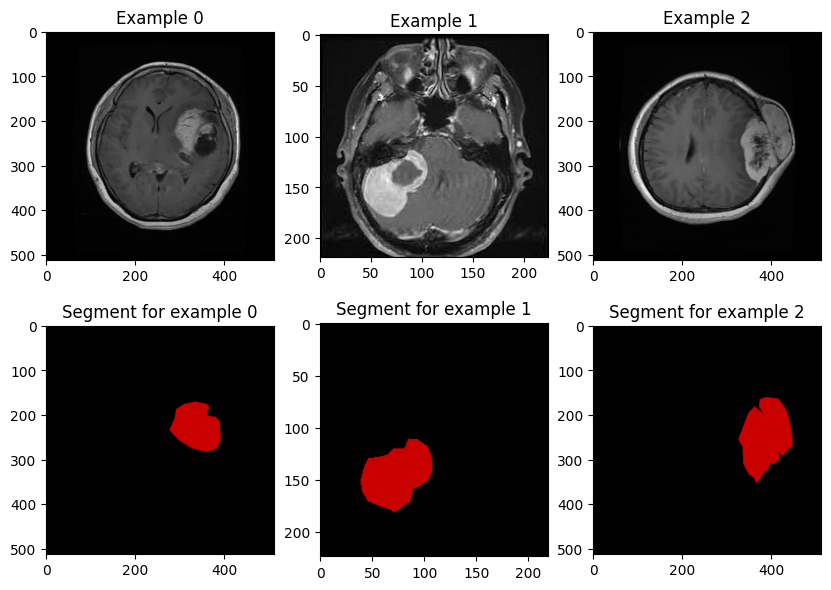

In [6]:
examples = [Image.open(DATASET_DIR + 'train/100.jpg'),Image.open(DATASET_DIR + 'train/116.jpg'),Image.open(DATASET_DIR+'train/221.jpg')]
examplesSeg = ['100.jpg20477','116.jpg10596','221.jpg19584']

## print some example images from train directory
fig = plt.figure(figsize=(10,14))

for i in range(0, len(examples)):
    a = fig.add_subplot(1, 3, i+1)
    imgplot = plt.imshow(examples[i])
    a.set_title('Example '+str(i))

## print segment examples for images from json annotations file
with open(DATASET_DIR+'train/annotations.json') as json_file:
    data = json.load(json_file)
    for i in range(0,len(examplesSeg)):
        # load regions from json file and transform them into (x,y) coordinates
        coord = list(zip(data[examplesSeg[i]]['regions'][0]['shape_attributes']['all_points_x'],data[examplesSeg[i]]['regions'][0]['shape_attributes']['all_points_y'])) 
        image = Image.new("RGB", np.asarray(examples[i]).shape[0:2])
        draw = ImageDraw.Draw(image)
        draw.polygon((coord), fill=200)
        a = fig.add_subplot(2, 3, 3+i+1)
        imgplot = plt.imshow(image)
        a.set_title('Segment for example ' + str(i))